<a href="https://colab.research.google.com/github/aripenguin/Data604/blob/main/604Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 604 Final Project

*Rise of the Resistance Queue Simulator*   
*By - Ariann Chai*

## Problem and its Significance

For my project, I will be simulating the waiting queue for Rise of the Resistance, a ride at the amusement park Disneyland. The project goal would be to get a look at what your wait time might look like for Rise of the Resistance.    
  
My inspiration for this came from my love of Disney and the Disney parks. Due to this, I watch a lot of Disneyland content on YouTube where one of my favorite channels is FreshBaked (https://www.youtube.com/@FreshBakedDisney). One of his topics he posts about is tips on ride queues (when or when not to get into queues for the lowest waiting times). There is a lot of focus on Rise of the Resistance queue given this ride only opened in 2020 and it is currently one of the most popular rides. Back in Fall 2023, he went on Rise of the Resistance 30 times and kept a spreadsheet of the different waiting times which he then shared an analysis of the data on YouTube (https://www.youtube.com/watch?v=zeiQzoqHjlo).


# Understanding the Queue
For his analysis, he broke the queue up into 7 different sections. I roughly outlined where the areas are and their path on the map. The red squares mark the transition to the next area.

Rise of the Resistance has two rooms where you stop and watch a short show before you sit in the ride vehicles. Disney counts the first showrooms (Rey’s room) as the start of the ride for their estimated wait times as he and we will also do.

Note: Rise of the Resistance is often shortened to RotR (this is how I will refer to it from now on for ease) and this map is just a rough outline of the queue not a accurate representative of it.

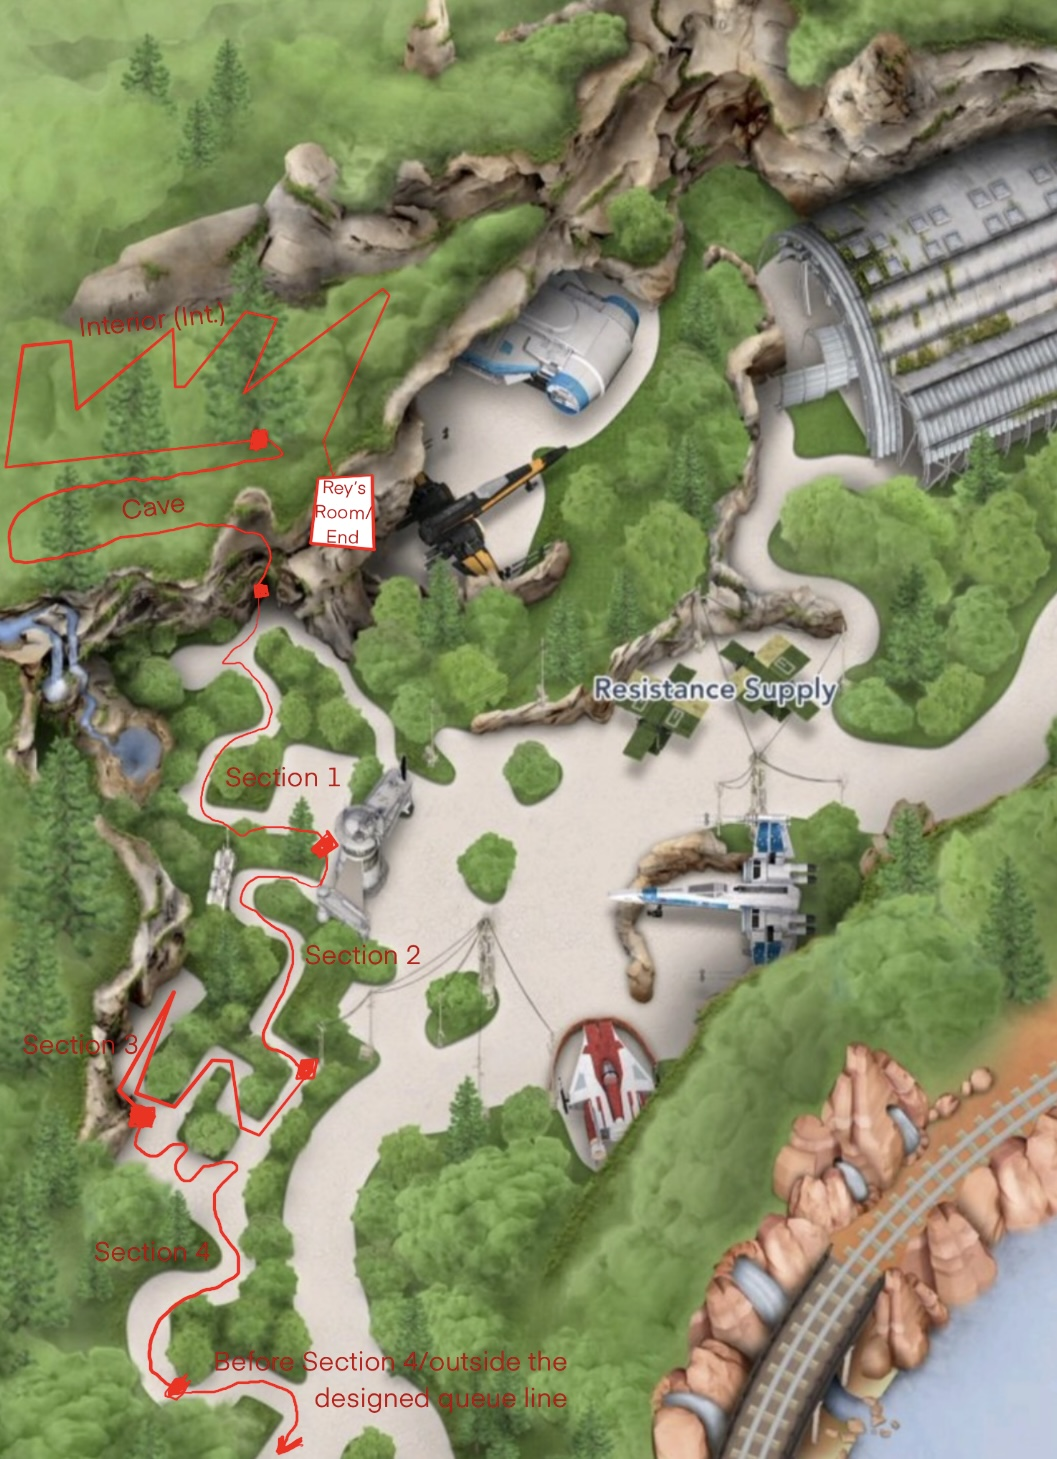



## Flow-chart model

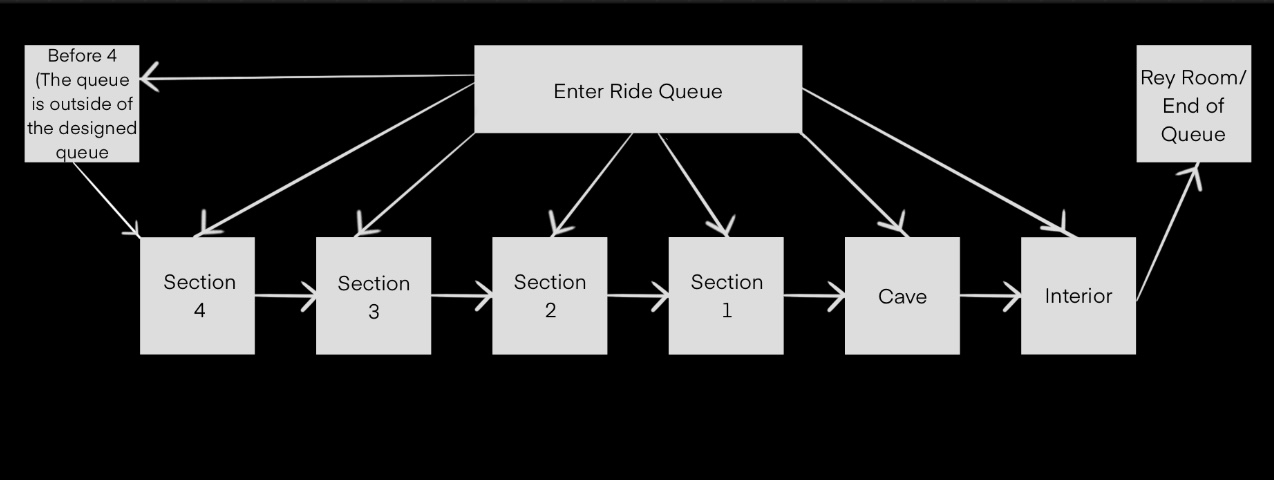

## Simulation


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# download modsim.py if necessary
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

# import functions from modsim
from modsim import *

Downloaded modsim.py


In [2]:
# I need this to make starting_point_count into an array where the numbers keep adding
# But it could have been used to make total time or turn any array into a consecutive one
def create_consecutive_array(count):
  consecutive_array = count
  consecutive_array[0] = count[0]
  for c in range(1, len(count)):
    consecutive_array[c] = consecutive_array[c-1]+count[c]
  return consecutive_array

def starting_room_generator(arr):
  room = random.randint(1,29)
  if room <= arr[0]: return 0
  for n in range(1, len(arr)):
    if arr[n-1] < room <= arr[n]: return n
  return 6

In [3]:
def update_func(t, waiting_times, total_times):
    # What room did you start in
    r = starting_room_generator(starting_point_consecutive)

    # While loop - get minute count for each room this run going in
    while r != 7:
      # Generate waiting time per room
      waiting_times.loc[t+1][r] = random.randint(time_between_min[r],time_between_max[r])

      # Add last total to latest frame/room
      total_times.loc[t+1][r] = total_times.loc[t+1][r-1] + waiting_times.loc[t+1][r]
      r += 1

    return waiting_times, total_times

In [5]:
def run_simulation(t_end):
    # TimeFrame for the 7 rooms waiting time in minutes (we never wait in Rey Room)
    waiting_times = TimeFrame(columns=['Before 4','4 to 3', '3 to 2', '2 to 1', '1 to Cave', 'Cave to Int', 'Int to Rey'])
    # Timeseries for total wait time - adds as it goes (When we enter this room we already wait _ minutes, , last column will have the total wait time)
    total_times = TimeFrame(columns=['Section 4','Section 3','Section 2','Section 1','Cave','Int','Rey'])

    # Every loop is a new simulated ride queue experience
    for t in range(0, t_end):
        waiting_times.loc[t+1], total_times.loc[t+1] = 0,0
        update_func(t, waiting_times, total_times)

    return waiting_times, total_times

In [4]:
# Set by using the averages from the spreadsheet

# Time between each room in minutes - Before 4, 4 to 3, 3 to 2, 2 to 1, 1 to Cave, Cave to Int, Int to Rey
time_between_avg = np.array([23,3,8,4,5,10,22])
time_between_min = np.array([23,2,3,2,2,1,5])
time_between_max = np.array([23,13,23,10,10,27,61])

# Number of starts at each room - Before 4, Section 4, Section 3, Section 2, Section 1, Cave, Int, Rey
# 1,3,7,4,7,4,3 out of 29 runs
starting_point_count = np.array([1,3,7,4,7,4,3])
# 1,4,11,15,22,26,29 - later we can test if num is in range 11-15: start room 2 (Section 3)
starting_point_consecutive = create_consecutive_array(starting_point_count)

In [6]:
# Set the random seed
random.seed(12322)

# Run for 29 simulations like the real data we have
waiting_times, total_times = run_simulation(29)
print(waiting_times)
print(total_times)

    Before 4  4 to 3  3 to 2  2 to 1  1 to Cave  Cave to Int  Int to Rey
1          0       0       0       0          0            4          37
2          0       0       6       6          9            7          43
3          0       0      23       9          2           10          53
4          0       0       0       0          0            0          14
5          0       0       0       0          0            0          47
6          0       0       0       0          0            0          50
7          0       0       0       0          4           26          25
8         23      12       9       2          5           17          57
9          0       0       0       3          3            7          56
10         0       0       0       0          0            0          31
11         0       0       0       0          0            0          34
12         0      12      16       4          4            7          32
13         0       0      18       7          2    

## Verification and Validation

Verification is about if the simulation is operating the way its suppose to. This was well tested during the development of the simulation using print statements and testing functions separately not as part of the whole simulation. So I can confirm that I have done the verification already.

To meet Validation, the model simulation must be a good representative of the data and be tracable. For Validation, I will compare the real data from FreshBaked to my simulation data. Below is the code for importing, cleaning, and plotting the real data only with the columns needed to match the waiting_times simulation data.

<ipython-input-7-f6693f61e3d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotr_waiting_times.drop([5,30], inplace=True)


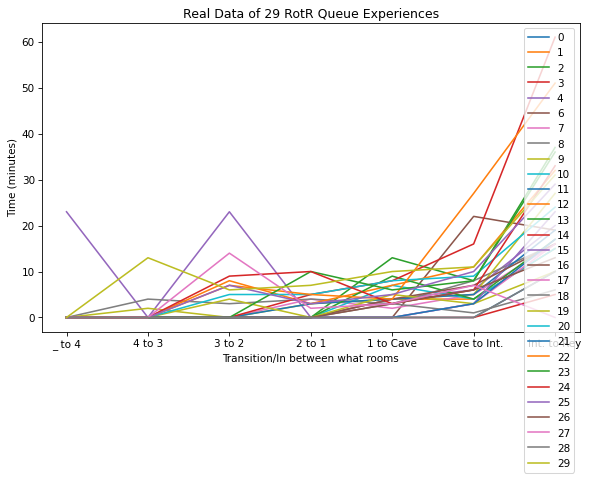

In [7]:
# Validation dataset
url = 'https://raw.githubusercontent.com/aripenguin/Data604/main/RotR_ride_data4.csv'
rotr_data = pd.read_csv(url)

# subset for needed data - I will test the simulation data waiting_times with the real data
rotr_waiting_times = rotr_data.iloc[:,[7,9,11,13,15,17,19]]

# clean dataset
rotr_waiting_times.drop([5,30], inplace=True)
rotr_waiting_times = rotr_waiting_times.fillna(0)

# change datatypes from float64 to int64
rotr_waiting_times = rotr_waiting_times.apply(lambda column: column.astype(int))
#print(rotr_waiting_times)

rotr_waiting_times.T.plot(figsize=(8, 6))

decorate(title = 'Real Data of 29 RotR Queue Experiences',
         xlabel='Transition/In between what rooms',
         ylabel='Time (minutes)')


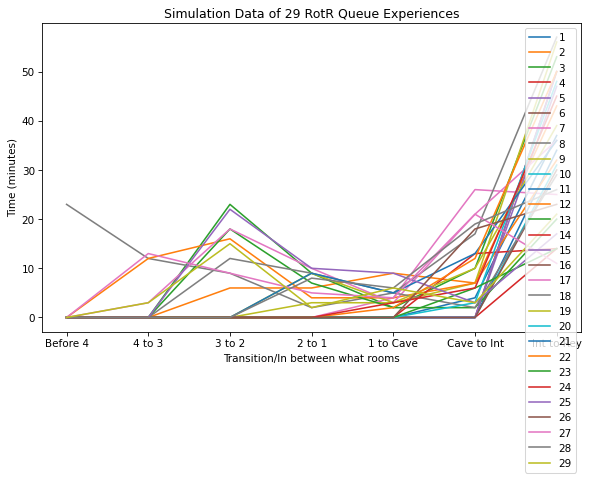

In [8]:
# Plot the results - a line for each row/run x = rooms/timeframe columns y = time(minutes)
waiting_times.T.plot(figsize=(8, 6))

decorate(title = 'Simulation Data of 29 RotR Queue Experiences',
         xlabel='Transition/In between what rooms',
         ylabel='Time (minutes)')

After plotting both the real data and the simulation data, there are clear patterns of the different ride queue experiences. This means that the model does suit the real data/ is a good representation of the real data.

However, I do think this is a very rough model as the ride queue experiences changes a lot based on other factors not mentioned (i.e. Time of date, Breakdowns, Other Events in the park, # of people current in the extra cost express/priority ride queue, did the ride just reopen from a breakdown).

In [9]:
# His average total wait time was 42-43 minutes

# Using my simulation data
round(total_times.loc[:, 'Rey'].mean())

# The simulation average came in ~21.81% higher than the real average.

55

## Findings from the model

Let's start with the last graph above which is all 29 simulation model ride queue experiences from waiting_times. Waiting_times kepts track of each transition/room's waiting time separately.

Through this graph we can see that transition from Interior to Rey's room (the section right before the ride starts) is where you tend to wait the longest.
You tend to spend the majority of your queue time in the shade or indoors (the cave and int. are both shaded/indoors). This could be due to you are more likely to just do the last couple of rooms to the ride start so that is where the majority of the queue is packed in or the sections (that FreshBaked sectioned off himself) are not equal in length.



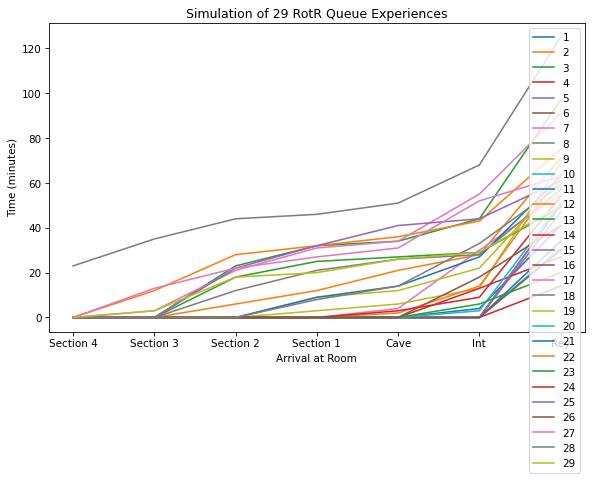

In [38]:
# Plot the results - a line for each row/run x = rooms/timeframe columns y = time(minutes)
total_times.T.plot(figsize=(8, 6))

decorate(title = 'Simulation of 29 RotR Queue Experiences',
         xlabel='Arrival at Room',
         ylabel='Time (minutes)')

Above is a graph of all 29 simulation model ride queue experiences from total_times. Total_times kepts adding on the different transitions' waiting time with the last column 'Rey' being the full wait time (i.e. Section 1 will contain the sum of any waiting you did from Before Section 4 to just making it to Section 1).

A lot of these simulation runs ends in the 40-60 minute range which works with both average waiting times we have (42-43 and 55). You can see the thick line at 0 for the first couple of rooms as 24 out of the 29 runs starting pass Section 3 and 19 out of the 29 starting pass Section 2.

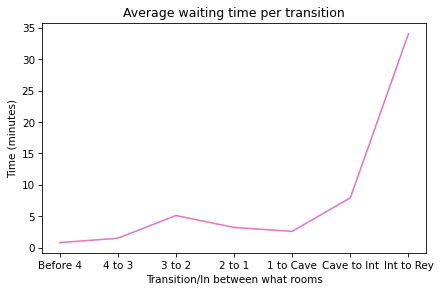

In [39]:
# Plot the average line for each row/run - waiting_time
waiting_times.mean().plot(color='C6')

decorate(title = 'Average waiting time per transition',
         xlabel='Transition/In between what rooms',
         ylabel='Time (minutes)')

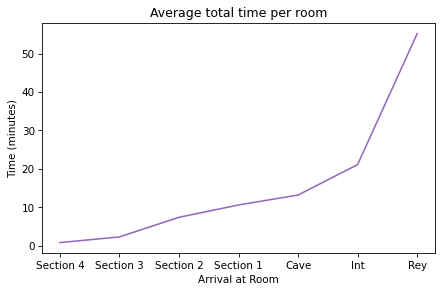

In [40]:
# Plot the average line for each row/run - total_times
total_times.mean().plot(color='C4')

decorate(title = 'Average total time per room',
         xlabel='Arrival at Room',
         ylabel='Time (minutes)')

The two plots above are the waiting_times and total_times simulation data simplified into one row for the average of each column. This is a clean way of observing the average ride queue experience of RotR. Waiting_times is more detailed than total_times given each column is independent as the total_times can seem skewed. You can see the rises and fall of individual transitions/rooms wait times in waiting_times most notably in the small spike the transition from Section 3 to 2 exhibits.

# Conclusions
I think this was a great start to building this simulation. Dealing with an discrete event simulation was a great way of finishing this semester as it felt familiar but I still learned a lot about creating queues. This was a very interesting simulation to build and data was fun to work with. This is a very simple version of a ride queue simulator as, for Disney queues, there is a lot more factors I would like to add in to make it even more accurate. The current accuracy is limited by the small amount of data we have to work with.  It would be a dream come true if Disney were to release some of their ride queue data, but I highly doubt they would.


I am inrigured to continue this simulation and add more events like breakdowns (He broke down the timeline of a breakdown in his video - 45 minutes to reboot after a breakdown & a 15 minute window after reopen of the minimum wait times) and a huge amount of extra cost express queue people (they go straight to the interior room and have priority for getting into Rey's room first). Something else to look into is incorporating the average wait per room transition as I used just min and max wait times to get a random wait time per transition.


## PowerPoint presentation  

link: https://docs.google.com/presentation/d/1ZdgNZoFj8CpiUgnS9YtjkE4Xr2F4cQOly8GvC9KM_lQ/edit?usp=sharing